# Linear Regression Model

## First Attempt

### Importing Libraries and Library Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Load and Describe Data

In [2]:
data_path = 'realtor-data.csv'  
data = pd.read_csv(data_path)

print(data.describe())
print(data.info())


        brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.650000e+05  3.000000e+00  2.000000e+00  1.500000e-01   
50%    5.288400e+04  3.250000e+05  3.000000e+00  2.000000e+00  2.600000e-01   
75%    7.918300e+04  5.500000e+05  4.000000e+00  3.000000e+00  9.800000e-01   
max    1.101420e+05  2.147484e+09  4.730000e+02  8.300000e+02  1.000000e+05   

             street      zip_code    house_size  
count  2.215516e+06  2.226083e+06  1.657898e+06  
mean   1.012325e+06  5.218668e+04  2.714471e+03  
std    5.837635e+05  2.895408e+04  8.081635e+05  
min    0.000000e+00  0.000000e+00  4.000000e+00  
25%    5.063128e+05  2.961700e+04  1.3

### Preliminary Data Handling

In [4]:
features = ['brokered_by', 'bed', 'bath', 'acre_lot', 'street', 'zip_code', 'house_size']
target = 'price'

data = data.dropna(subset=features + [target])

scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

### Visualizing Data Correlation Using Heatmap

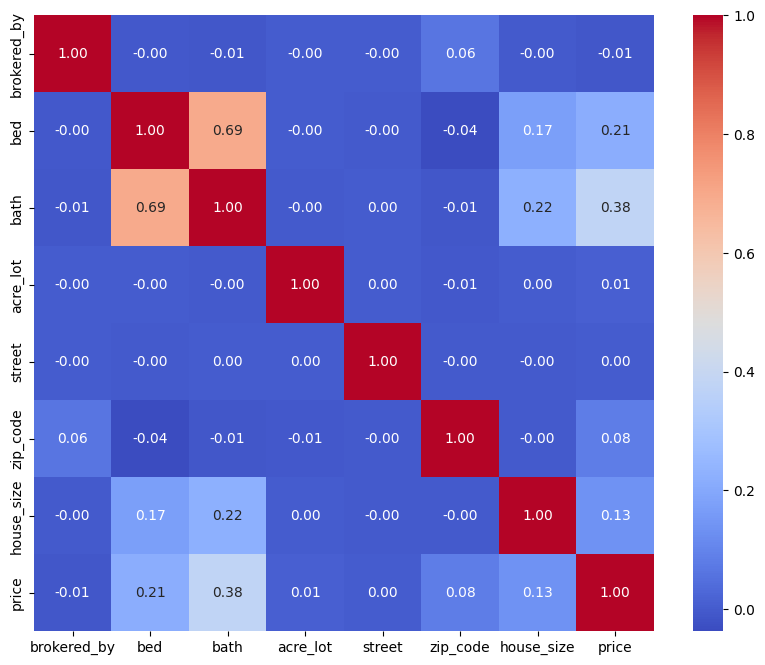

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Preparing Data for Model

In [6]:
X = data[features].values
y = data[target].values

## Splitting Train and Test Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating and Training the Linear Regression Model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Making Predictions and Evaluating the Model

In [9]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 994866083116.30
R-squared: 0.19


### Visualizing Results

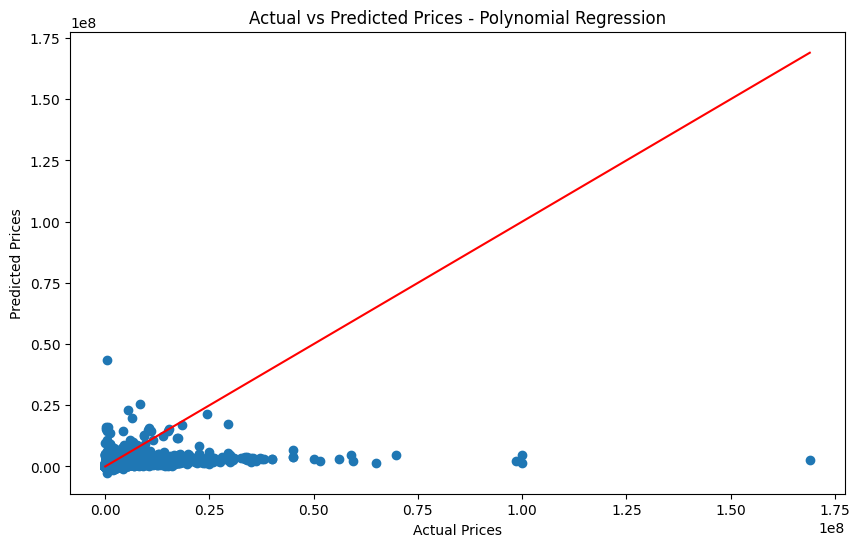

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.show()

## Attempt 2

First few rows of the dataset:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_r

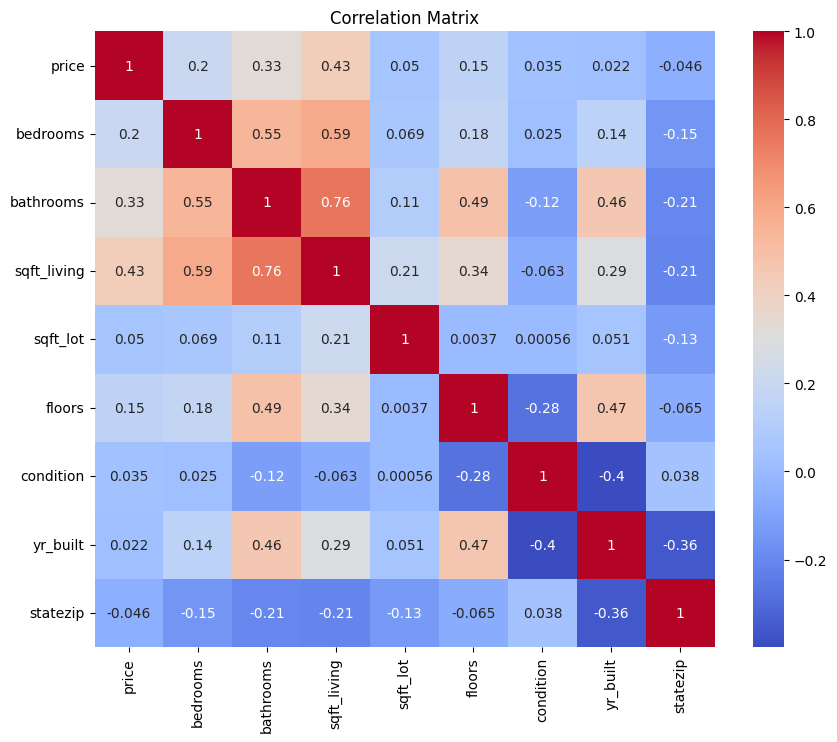

Mean Squared Error: 991657231245.96
R-squared: 0.03


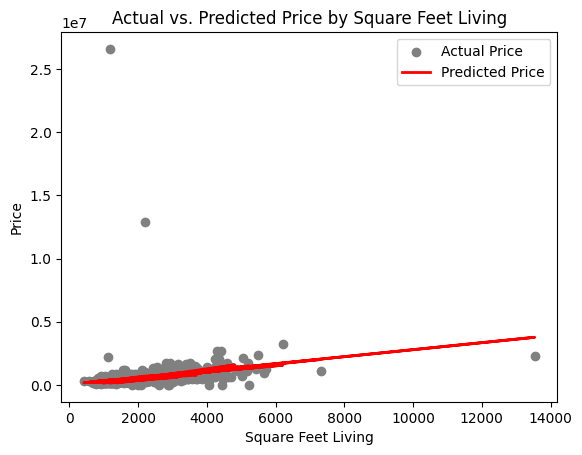

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('data.csv')  

print("First few rows of the dataset:")
print(df.head())

df.drop(['date', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'street', 'city', 'country'], axis=1, inplace=True)

df['statezip'] = df['statezip'].apply(lambda x: int(x.split(' ')[1]))

print("\nMissing values in each column:")
print(df.isnull().sum())
df.dropna(inplace=True) 

print("\nDataFrame info after preprocessing:")
print(df.info())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

plt.scatter(X_test['sqft_living'], y_test, color='gray', label='Actual Price')
plt.plot(X_test['sqft_living'], y_pred, color='red', linewidth=2, label='Predicted Price')
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price by Square Feet Living')
plt.legend()
plt.show()